In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random

In [11]:
print(os.listdir('./cell_images'))

['Uninfected', 'Parasitized']


In [12]:
infected = os.listdir('./cell_images/Parasitized/') 
uninfected = os.listdir('./cell_images/Uninfected/')

In [13]:
data=[]
labels=[]
Parasitized=os.listdir("./cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("./cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("./cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("./cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [14]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [15]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (27558, 50, 50, 3) | labels : (27558,)


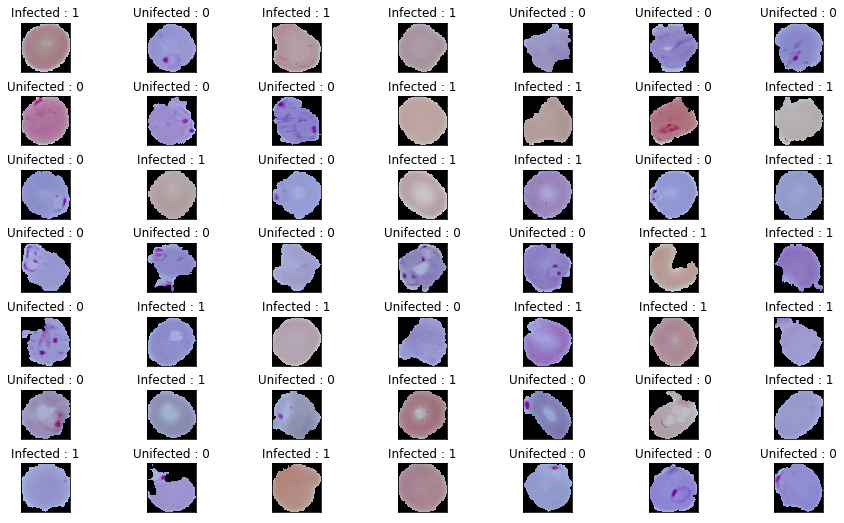

In [16]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

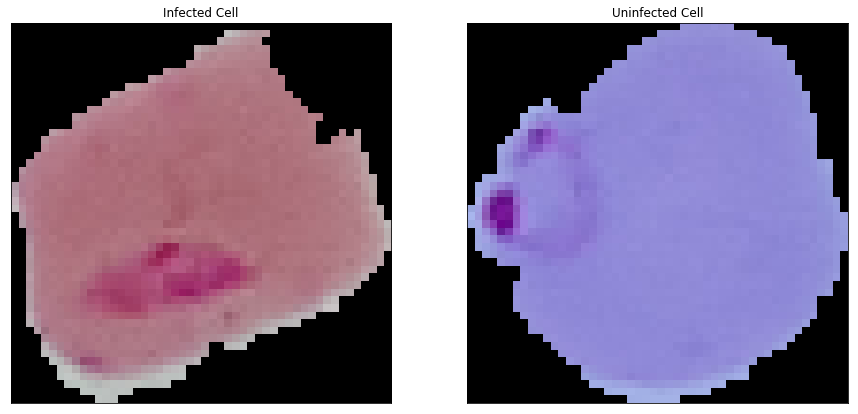

In [19]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[4])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [20]:
Cells=np.array(data)
labels=np.array(labels)

In [21]:
np.save("Cells",Cells)
np.save("labels",labels)

In [22]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [23]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [24]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [25]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [26]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [27]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [28]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
model.add(Dense(2,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=False,
        vertical_flip=False)  
datagen.fit(x_train)

In [31]:
from keras.callbacks import EarlyStopping
earlystop= EarlyStopping(monitor='val_acc', patience=3)
epochs = 20
batch_size = 256

In [32]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
__________

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[earlystop])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
96/96 [==============================] - 102s 1s/step - loss: 1.8058 - acc: 0.6282 - val_loss: 0.5768 - val_acc: 0.7358
Epoch 2/20
96/96 [==============================] - 58s 603ms/step - loss: 0.5186 - acc: 0.7860 - val_loss: 0.3809 - val_acc: 0.8740
Epoch 3/20
96/96 [==============================] - 59s 614ms/step - loss: 0.3431 - acc: 0.8889 - val_loss: 0.2778 - val_acc: 0.9045
Epoch 4/20
96/96 [==============================] - 58s 604ms/step - loss: 0.2907 - acc: 0.9139 - val_loss: 0.2834 - val_acc: 0.9154
Epoch 5/20
96/96 [==============================] - 58s 609ms/step - loss: 0.2736 - acc: 0.9214 - val_loss: 0.2395 - val_acc: 0.9328
Epoch 6/20
96/96 [==============================] - 58s 607ms/step - loss: 0.2519 - acc: 0.9316 - val_loss: 0.2386 - val_acc: 0.9343
Epoch 7/20
96/96 [==============================] - 58s 608ms/step - loss: 0.2503 - acc: 0.9349 - val_loss: 0.2166 - val_acc: 0.9510
Epoch 8/20
96/96 [=====

In [35]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

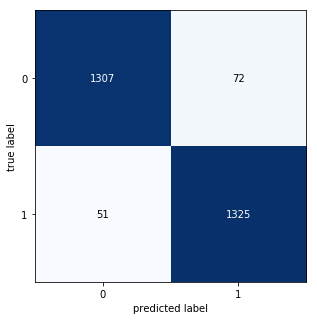

In [36]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()